In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# year = pd.read_excel("sample data/ACSST5Y2023.S0101-2025-07-20T011441.xlsx", sheet_name="Information")
# year = year['Unnamed: 1'][6]
# year
# df = pd.read_excel("sample data/ACSST5Y2023.S0101-2025-07-20T011441.xlsx", sheet_name="Data", header=0)
# city = df.columns[1]
# df = pd.read_excel("sample data/ACSST5Y2023.S0101-2025-07-20T011441.xlsx", sheet_name="Data", header=2)

In [3]:
xls = pd.ExcelFile("sample data/ACSST5Y2023.S0101-2025-07-18T231941.xlsx")

# Extract year from the 'Information' sheet
info_df = xls.parse(sheet_name="Information")
year = info_df['Unnamed: 1'][6]

# Extract city from the first row (header=0) of 'Data' sheet
header_df = xls.parse(sheet_name="Data", header=0)
city = header_df.columns[1]

# Extract main data with proper headers (header=2)
df = xls.parse(sheet_name="Data", header=2)

print(year)
print(city)
print(df)

2023
Prescott city, Arizona
                                Label Estimate Margin of Error Estimate.1  \
0                    Total population   46,744             ±36        (X)   
1                                 AGE      NaN             NaN        NaN   
2                       Under 5 years    1,441            ±304       3.1%   
3                        5 to 9 years    1,328            ±269       2.8%   
4                      10 to 14 years    1,400            ±290       3.0%   
5                      15 to 19 years    2,670            ±338       5.7%   
6                      20 to 24 years    2,395            ±395       5.1%   
7                      25 to 29 years    1,825            ±374       3.9%   
8                      30 to 34 years    1,944            ±331       4.2%   
9                      35 to 39 years    1,652            ±228       3.5%   
10                     40 to 44 years    1,257            ±268       2.7%   
11                     45 to 49 years    1,865  

In [16]:
data = {"Total Estimate":df['Estimate'][0], "Male Estimate": df['Estimate.2'][0], "Female Estimate":df['Estimate.4'][0]}
total_population = pd.DataFrame(data=data, index=[0])
cols = ['Female Estimate', 'Male Estimate', 'Total Estimate']
total_population[cols] = total_population[cols].apply(lambda x: x.str.replace(",", "").astype(int))

total_population


,Total Estimate,Male Estimate,Female Estimate
0,46744,23372,23372


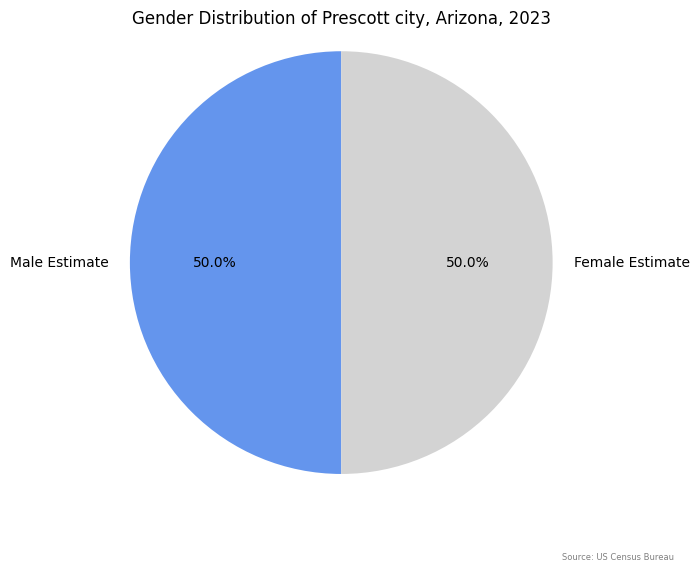

In [5]:
size = [total_population['Male Estimate'][0],total_population['Female Estimate'][0]]
labels = [total_population.columns[1],total_population.columns[2]]
plt.figure(figsize=(6, 6))
plt.pie(size,labels=labels, autopct='%1.1f%%', startangle=90, colors=['cornflowerblue', 'lightgray'])
plt.title(f'Gender Distribution of {city}, {year}')
plt.axis('equal') 
plt.figtext(0.88, 0.001, "Source: US Census Bureau", ha="left", fontsize=6, color="gray")

plt.show()

In [6]:
data = {"Age":df['Label'][2:20],"Total Estimate":df['Estimate'][2:20],"Male Estimate":df['Estimate.2'][2:20],"Female Estimate":df['Estimate.4'][2:20]}
Age = pd.DataFrame(data=data)
cols = ['Female Estimate', 'Male Estimate', 'Total Estimate']
Age[cols] = Age[cols].apply(lambda x: x.str.replace(",", "").astype(int))

Age

,Age,Total Estimate,Male Estimate,Female Estimate
2,Under 5 years,1441,749,692
3,5 to 9 years,1328,835,493
4,10 to 14 years,1400,806,594
5,15 to 19 years,2670,1617,1053
6,20 to 24 years,2395,1329,1066
7,25 to 29 years,1825,812,1013
8,30 to 34 years,1944,792,1152
9,35 to 39 years,1652,1080,572
10,40 to 44 years,1257,679,578
11,45 to 49 years,1865,821,1044


Text(0.88, 0.001, 'Source: US Census Bureau')

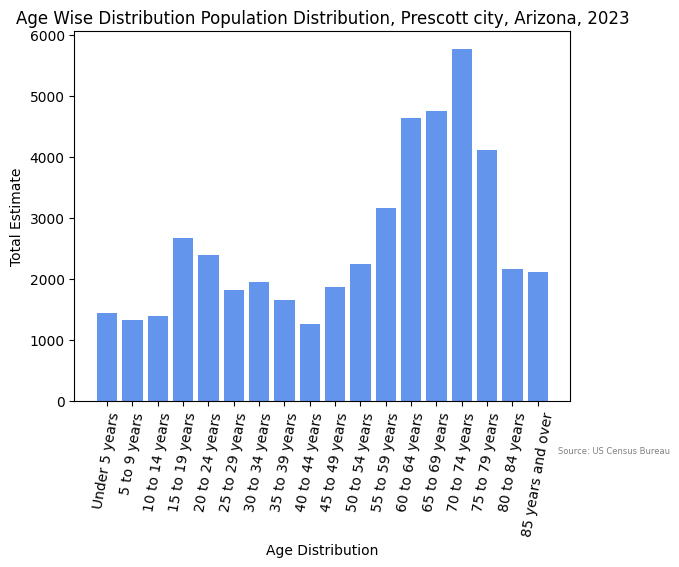

In [7]:
plt.bar(Age['Age'],Age['Total Estimate'],color='cornflowerblue')
plt.xlabel("Age Distribution")
plt.xticks(rotation = 80)
plt.ylabel('Total Estimate')
plt.title(f"Age Wise Distribution Population Distribution, {city}, {year}")
plt.figtext(0.88, 0.001, "Source: US Census Bureau", ha="left", fontsize=6, color="gray")



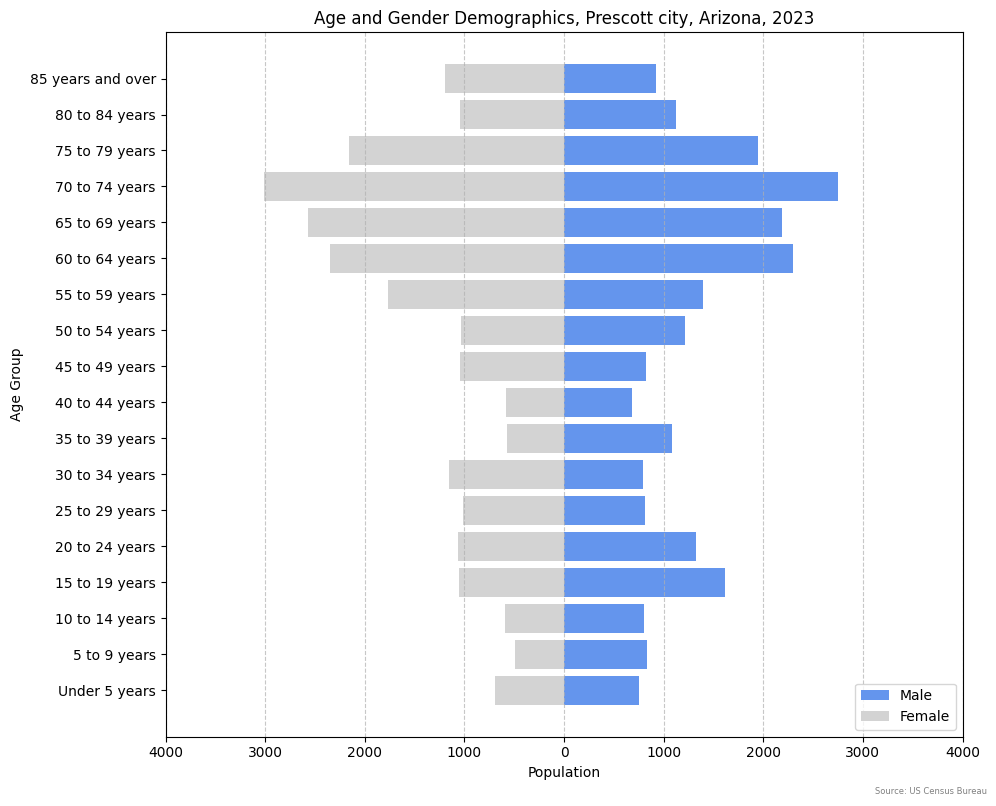

In [8]:
# Convert female values to negative for mirroring
Age['Female Estimate'] = -Age['Female Estimate']

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))

# Horizontal bars
ax.barh(Age['Age'], Age['Male Estimate'], color='cornflowerblue', label='Male')
ax.barh(Age['Age'], Age['Female Estimate'], color='lightgray', label='Female')

# Labeling and styling
ax.set_title(f'Age and Gender Demographics, {city}, {year}')
ax.set_xlabel('Population')
ax.set_ylabel('Age Group')
ax.legend(loc='lower right')
ax.grid(axis='x', linestyle='--', alpha=0.7)
ax.set_xlim([-4000, 4000])  # Adjust based on your data range

# Custom x-axis tick labels for symmetric view
xticks = range(-4000, 4001, 1000)
ax.set_xticks(xticks)
ax.set_xticklabels([abs(x) for x in xticks])

plt.tight_layout()
plt.figtext(0.88, 0.001, "Source: US Census Bureau", ha="left", fontsize=6, color="gray")
plt.show()


In [14]:
Age.to_json(orient='records', lines=True)

'{"Age":"Under 5 years","Total Estimate":1441,"Male Estimate":749,"Female Estimate":-692}\n{"Age":"5 to 9 years","Total Estimate":1328,"Male Estimate":835,"Female Estimate":-493}\n{"Age":"10 to 14 years","Total Estimate":1400,"Male Estimate":806,"Female Estimate":-594}\n{"Age":"15 to 19 years","Total Estimate":2670,"Male Estimate":1617,"Female Estimate":-1053}\n{"Age":"20 to 24 years","Total Estimate":2395,"Male Estimate":1329,"Female Estimate":-1066}\n{"Age":"25 to 29 years","Total Estimate":1825,"Male Estimate":812,"Female Estimate":-1013}\n{"Age":"30 to 34 years","Total Estimate":1944,"Male Estimate":792,"Female Estimate":-1152}\n{"Age":"35 to 39 years","Total Estimate":1652,"Male Estimate":1080,"Female Estimate":-572}\n{"Age":"40 to 44 years","Total Estimate":1257,"Male Estimate":679,"Female Estimate":-578}\n{"Age":"45 to 49 years","Total Estimate":1865,"Male Estimate":821,"Female Estimate":-1044}\n{"Age":"50 to 54 years","Total Estimate":2249,"Male Estimate":1216,"Female Estimate"